In [0]:
# importing libraries and modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import SVR
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [0]:
#reading data from the mount to the pyspark dataframe
data = spark.read.format('csv').options(header='true', inferSchema='true').load('/mnt/data270-group10-mount-data/refined data/final_processed_dataset.csv')

In [0]:
#converting into pandas dataframe
df = data.toPandas()

In [0]:
#dropping the index column
df.drop('_c0',axis=1, inplace=True)

In [0]:
#displaying top 5 rows of the dataset
df.head()

,date,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
0,2015-06-30,30,3,3,6,2541.0,0.03,33.8,8.1,73.8,9.7,2,0
1,2015-03-29,29,1,3,3,1458.0,0.00,22.0,8.8,78.9,9.4,1,0
2,2015-11-22,22,1,3,11,1700.0,0.00,22.0,9.3,5.7,9.9,0,0
3,2015-09-17,17,5,3,9,2718.0,0.00,18.3,12.2,45.4,9.9,1,0
4,2015-12-03,3,5,3,12,2748.0,0.00,22.0,11.7,45.9,9.9,1,0


In [0]:
# performing exploratory analysis to understand data
df.describe()

,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,4.002740,5.000000,6.526027,3597.172603,0.025370,22.110685,11.557534,59.196986,9.501370,1.265753,0.027397
std,8.802278,1.999312,2.001371,3.450215,1579.853104,0.118649,3.605806,2.673044,26.461971,0.850416,0.884591,0.163350
min,1.000000,1.000000,3.000000,1.000000,986.000000,0.000000,16.100000,5.600000,0.000000,3.600000,0.000000,0.000000
25%,8.000000,2.000000,3.000000,4.000000,2475.000000,0.000000,20.800000,10.000000,40.900000,9.600000,1.000000,0.000000
50%,16.000000,4.000000,5.000000,7.000000,2789.500000,0.000000,22.000000,11.200000,63.800000,9.900000,1.000000,0.000000
75%,23.000000,6.000000,7.000000,10.000000,5440.000000,0.000000,22.000000,12.800000,81.400000,9.900000,1.000000,0.000000
max,31.000000,7.000000,7.000000,12.000000,6876.000000,1.290000,41.400000,24.900000,99.900000,9.900000,5.000000,1.000000


In [0]:
#getting the details and data types of the features and labels 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 730 non-null    datetime64[ns]
 1   day_of_data          730 non-null    int32         
 2   day_of_week          730 non-null    int32         
 3   direction_of_travel  730 non-null    int32         
 4   month_of_data        730 non-null    int32         
 5   traffic_volume       730 non-null    float64       
 6   precip               730 non-null    float64       
 7   windgust             730 non-null    float64       
 8   windspeed            730 non-null    float64       
 9   cloudcover           730 non-null    float64       
 10  visibility           730 non-null    float64       
 11  conditions           730 non-null    int32         
 12  holiday              730 non-null    int32         
dtypes: datetime64[ns](1), float64(6), i

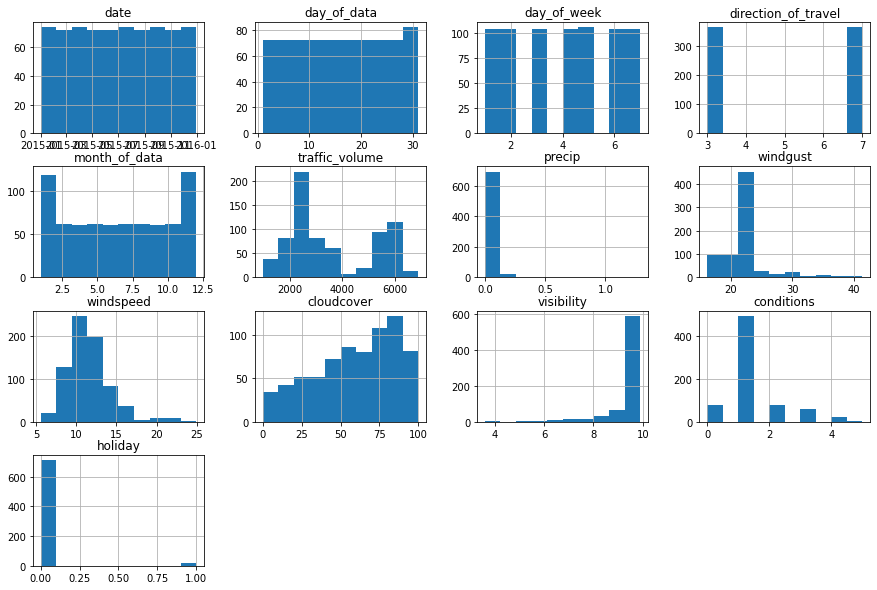

In [0]:
# understanding the distribution of the dataset
import numpy as nm
import seaborn as sns# 
from numpy import random
from numpy import mean
import matplotlib.pyplot as plt

df.hist(bins = 10, figsize = (15,10))
plt.show()

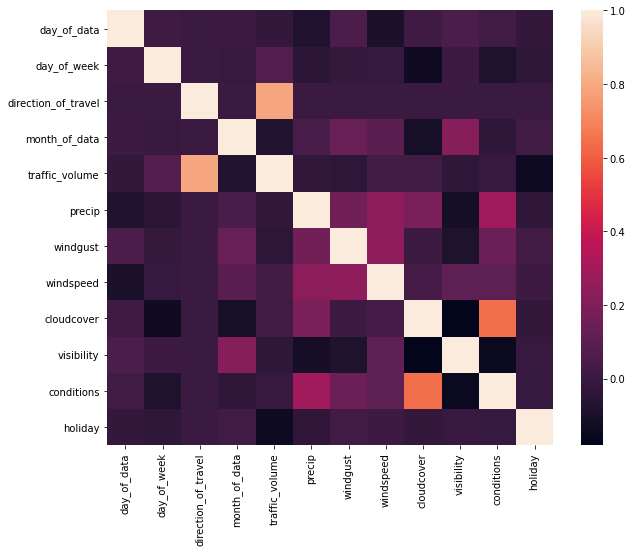

In [0]:
# finding the correlation 

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()

In [0]:
# finding the correlation 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,day_of_data,day_of_week,direction_of_travel,month_of_data,traffic_volume,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
day_of_data,1.0000,0.0163,0.0000,0.0119,-0.0205,-0.0760,0.0549,-0.0974,0.0165,0.0521,0.0198,-0.0233
day_of_week,0.0163,1.0000,0.0000,-0.0086,0.0754,-0.0460,-0.0171,-0.0138,-0.1344,0.0090,-0.0857,-0.0338
direction_of_travel,0.0000,0.0000,1.0000,0.0000,0.7889,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
month_of_data,0.0119,-0.0086,0.0000,1.0000,-0.0729,0.0491,0.1337,0.1003,-0.1081,0.2181,-0.0369,0.0182
traffic_volume,-0.0205,0.0754,0.7889,-0.0729,1.0000,-0.0245,-0.0380,0.0275,0.0217,-0.0349,-0.0059,-0.1407
precip,-0.0760,-0.0460,0.0000,0.0491,-0.0245,1.0000,0.1624,0.2371,0.1879,-0.1122,0.2933,-0.0302
windgust,0.0549,-0.0171,0.0000,0.1337,-0.0380,0.1624,1.0000,0.2462,0.0041,-0.0876,0.1459,0.0247
windspeed,-0.0974,-0.0138,0.0000,0.1003,0.0275,0.2371,0.2462,1.0000,0.0323,0.1078,0.1066,0.0108
cloudcover,0.0165,-0.1344,0.0000,-0.1081,0.0217,0.1879,0.0041,0.0323,1.0000,-0.1809,0.6442,-0.0212
visibility,0.0521,0.0090,0.0000,0.2181,-0.0349,-0.1122,-0.0876,0.1078,-0.1809,1.0000,-0.1515,-0.0062


In [0]:
# Building the Decision Tree Machine learning model  

X = df.drop(["date","traffic_volume"], axis = 1)
X.head()


,day_of_data,day_of_week,direction_of_travel,month_of_data,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
0,30,3,3,6,0.03,33.8,8.1,73.8,9.7,2,0
1,29,1,3,3,0.00,22.0,8.8,78.9,9.4,1,0
2,22,1,3,11,0.00,22.0,9.3,5.7,9.9,0,0
3,17,5,3,9,0.00,18.3,12.2,45.4,9.9,1,0
4,3,5,3,12,0.00,22.0,11.7,45.9,9.9,1,0


In [0]:
y = df["traffic_volume"]
y = y.reset_index().drop("index", axis=1)
y.head()


,traffic_volume
0,2541.0
1,1458.0
2,1700.0
3,2718.0
4,2748.0


In [0]:
X

,day_of_data,day_of_week,direction_of_travel,month_of_data,precip,windgust,windspeed,cloudcover,visibility,conditions,holiday
0,30,3,3,6,0.03,33.8,8.1,73.8,9.7,2,0
1,29,1,3,3,0.00,22.0,8.8,78.9,9.4,1,0
2,22,1,3,11,0.00,22.0,9.3,5.7,9.9,0,0
3,17,5,3,9,0.00,18.3,12.2,45.4,9.9,1,0
4,3,5,3,12,0.00,22.0,11.7,45.9,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
725,27,6,7,2,0.00,22.0,15.9,87.0,9.9,1,0
726,12,4,7,8,0.00,17.2,14.4,43.7,9.9,1,0
727,31,2,7,8,0.00,21.9,10.4,75.3,9.8,1,0
728,21,2,7,9,0.00,20.8,14.8,64.2,9.9,1,0


In [0]:
#Splitting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=44)

In [0]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

Out[208]: ((438, 11), (146, 11), (438, 1), (146, 1))

In [0]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     day_of_data  day_of_week  direction_of_travel  month_of_data  precip  \
241           11            6                    3              9     0.0   
684           12            1                    7              4     0.0   
221           15            5                    3              1     0.0   
168           26            1                    3              7     0.0   
497            6            1                    7             12     0.0   

     windgust  windspeed  cloudcover  visibility  conditions  holiday  
241      22.0        9.1        78.2         9.7           1        0  
684      18.3       10.3        23.6         9.9           1        0  
221      22.0       10.0        18.1         9.9           0        0  
168      17.2       11.1        51.7         9.9           1        0  
497      22.0       13.1        66.0         9.9           1        0  
     day_of_data  day_of_week  direction_of_travel  month_of_data  precip  \
611           24            

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth': [1,2,3,4,5,10, 15, 20, 25, 50, 100,200]}]
MSE_dt = ['mean_squared_error(y_test,y_pred)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=4)
    regressor_dt.fit(X_train, y_train.values.ravel())
    y_true, y_pred = y_test, regressor_dt.predict(X_test)
    
print('The optimum max_depth for Decision Tree is: ', regressor_dt.best_params_ )

The optimum max_depth for Decision Tree is:  {'max_depth': 5}


In [0]:
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 4)
regressor_dt.fit(X_train,y_train)

Out[211]: DecisionTreeRegressor(max_depth=4, random_state=0)

In [0]:
y_pred = regressor_dt.predict(X_test)  


In [0]:
MSE_dt  = mean_squared_error(y_test,y_pred)

Out[214]: Text(0.5, 1.0, 'Decision Tree Regression ')

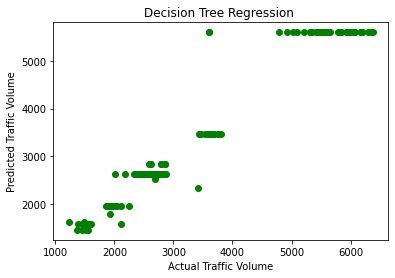

In [0]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Decision Tree Regression ")

Populating the interactive namespace from numpy and matplotlib


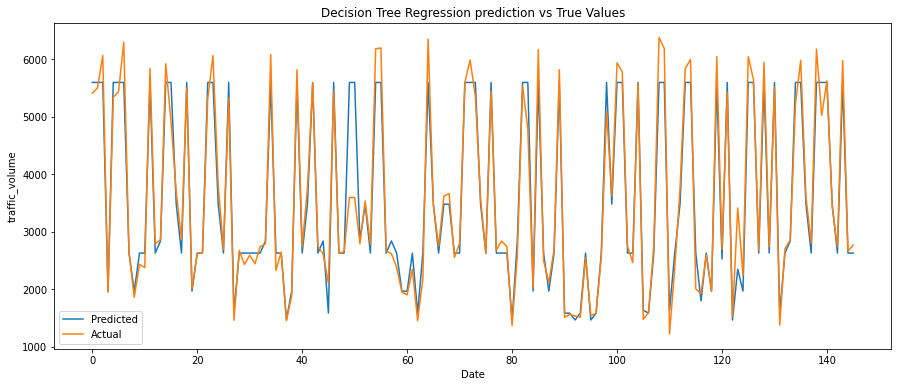

The R^2 value for AdaBoost Regressor is       : 0.947
The adj R2 value for Decision Tree Regressor is  : 0.946
The MSE value for Decision Tree Regressor is        : 136237
The RMSE value for Decision Tree Regressor is  : 369


In [0]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('traffic_volume')
plt.xlabel('Date')
plt.title('Decision Tree Regression prediction vs True Values')
plt.legend()
plt.show()
print('The R^2 value for AdaBoost Regressor is       :', round((r2_score(y_test,y_pred)), 3))
print('The adj R2 value for Decision Tree Regressor is  :', round((1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The MSE value for Decision Tree Regressor is        :', round(MSE_dt));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));

In [0]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error , mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

MSE_rf  = mean_squared_error(y_test,y_pred)
MAE_rf  = mean_absolute_error(y_test,y_pred)
RMSLE_rf = mean_squared_log_error(y_test, y_pred)
MAPE_rf = mean_absolute_percentage_error(y_test, y_pred)


from sklearn import metrics
print('The R^2 value for Decision Tree Regressor is       :', round((r2_score(y_test,y_pred)), 3))
print('The Adjusted R2 value for Decision Tree Regressor is :', round((1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1)),3))
print('The MSE value for Decision Tree Regressor is :', round(MSE_rf));
print('The MAE value for Decision Tree Regressor is :', round(MAE_rf));
print('The RMSE value for Decision Tree Regressor is :', round(np.sqrt(MSE_rf)));
print('The RMSLE value for Decision Tree Regressor is        :', RMSLE_rf);
print('The MAPE value for Decision Tree Regressor is        :', MAPE_rf);

The R^2 value for Decision Tree Regressor is       : 0.947
The Adjusted R2 value for Decision Tree Regressor is : 0.946
The MSE value for Decision Tree Regressor is : 136237
The MAE value for Decision Tree Regressor is : 231
The RMSE value for Decision Tree Regressor is : 369
The RMSLE value for Decision Tree Regressor is        : 0.009147845857088045
The MAPE value for Decision Tree Regressor is        : 0.06544947968173093
